In [46]:
import pandas as pd
import requests, json
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib

### 爬取證交所 2330.tw 股價

In [47]:
date = '20210101'
stock_no = '2330'

html = requests.get('https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=json&date=%s&stockNo=%s' % (date,stock_no))
content = json.loads(html.text)
stock_data = content['data']
col_name = content['fields']

df_twse = pd.DataFrame(data=stock_data, columns=col_name)
df_twse.set_index('日期', inplace=True)
df_twse.head()

,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
日期,,,,,,,,
110/01/04,"39,489,959","21,127,581,248",530.00,540.00,528.00,536.00,+6.00,"33,316"
110/01/05,"34,839,391","18,761,831,567",536.00,542.00,535.00,542.00,+6.00,"28,512"
110/01/06,"55,614,434","30,572,783,229",555.00,555.00,541.00,549.00,+7.00,"55,462"
110/01/07,"53,392,763","30,018,630,685",554.00,570.00,553.00,565.00,+16.00,"47,905"
110/01/08,"62,957,148","36,339,702,855",580.00,580.00,571.00,580.00,+15.00,"56,426"


### 爬取雅虎股市資料 - BeautifulSoup

In [73]:
# Yahoo 股市歷史數據的網址
url = "https://hk.finance.yahoo.com/quote/2330.TW/history/"

# 發送請求，並解析 HTML
response = requests.get(url, headers={'User-Agent': 'Custom'})

soup = BeautifulSoup(response.text, 'html.parser')


# 保存交易資訊的列表
trade_data = []

# 爬取表格中的每一行數據
for row in soup.find_all('tr', class_='BdT'):
    columns = row.find_all('td')

    # 檢查確保數據行不是空的
    if len(columns) >= 6:
        # 日期
        date_text = columns[0].text
        # 開盤價、最高價、最低價、收盤價、成交量
        open_price = columns[1].text
        high_price = columns[2].text
        low_price = columns[3].text
        close_price = columns[4].text
        volume = columns[6].text

        # 添加到交易數據列表
        trade_data.append({
            '日期': date_text,
            '開盤價': float(open_price.replace(',', '')),
            '收盤價': float(close_price.replace(',', '')),
            '成交量': int(volume.replace(',', ''))
        })


df_yahoo = pd.DataFrame(trade_data)
# df_yahoo.set_index('日期', inplace=True)
df_yahoo = df_yahoo.iloc[::-1]

df_yahoo.head()

,日期,開盤價,收盤價,成交量
97,2024年5月03日,788.0,780.0,29901556
96,2024年5月06日,791.0,786.0,32599878
95,2024年5月07日,797.0,800.0,33890214
94,2024年5月08日,794.0,802.0,21757193
93,2024年5月09日,798.0,796.0,21923999


## 爬取yahoo股市後並視覺化

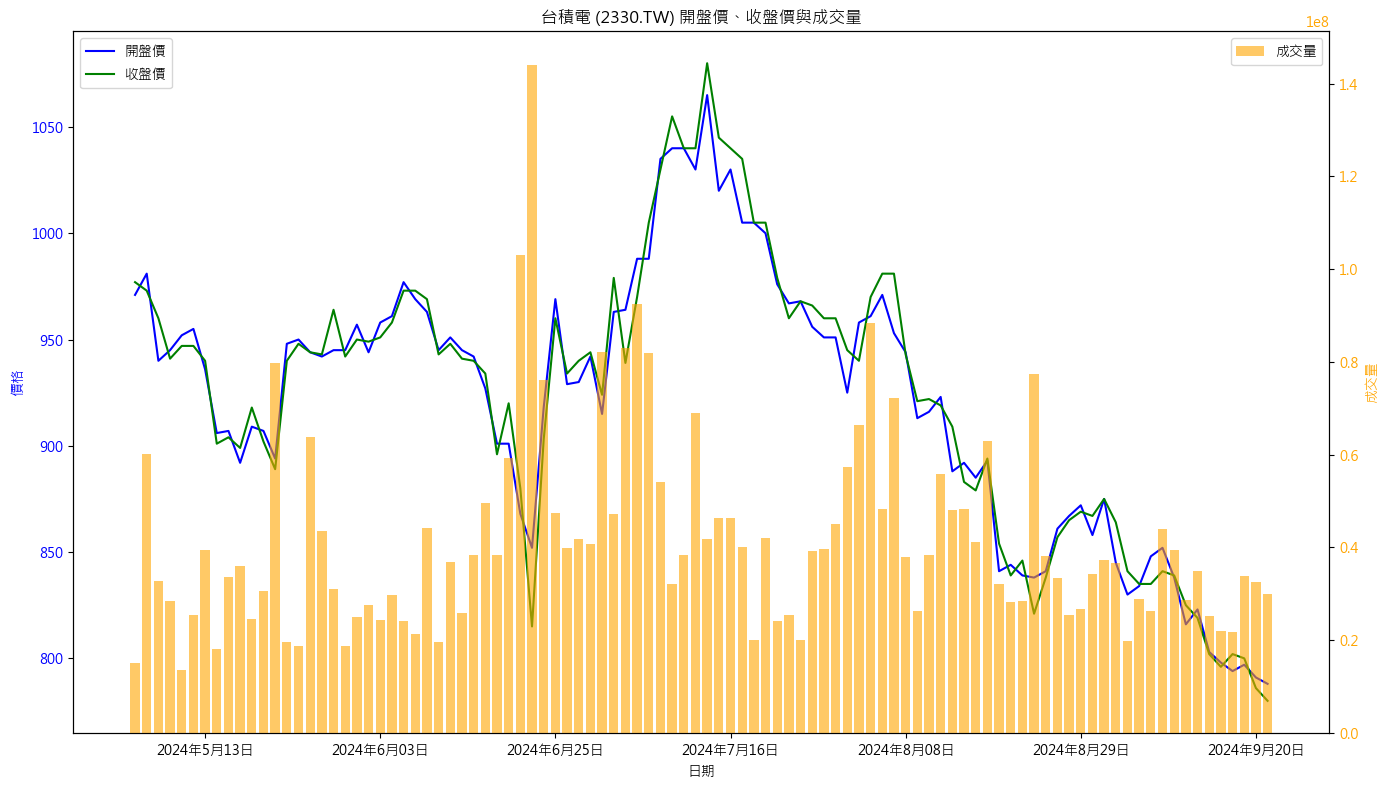

In [74]:

# 開始繪圖
fig, ax1 = plt.subplots(figsize=(14, 8))

# 繪製開盤價和收盤價的折線圖（左側 y 軸）
ax1.set_xlabel('日期')
plt.xticks([i for i in range(len(df_yahoo['日期']))], df_yahoo['日期'])
ax1.set_ylabel('價格', color='blue')
ax1.plot(df_yahoo.index, df_yahoo['開盤價'], label='開盤價', color='blue')
ax1.plot(df_yahoo.index, df_yahoo['收盤價'], label='收盤價', color='green')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')

# # 設置 x 軸的日期區間為 15 天
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=15))
# ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# 創建第二個 y 軸來繪製成交量
ax2 = ax1.twinx()
ax2.set_ylabel('成交量', color='orange')
ax2.bar(df_yahoo.index, df_yahoo['成交量'], color='orange', alpha=0.6, label='成交量')
ax2.tick_params(axis='y', labelcolor='orange')
ax2.legend(loc='upper right')

# 調整圖表格式
plt.title('台積電 (2330.TW) 開盤價、收盤價與成交量')
fig.tight_layout()

# 顯示圖表
plt.legend()


In [67]:
df_yahoo['日期']

0     2024年9月23日
1     2024年9月20日
2     2024年9月19日
3     2024年9月18日
4     2024年9月16日
         ...    
93    2024年5月09日
94    2024年5月08日
95    2024年5月07日
96    2024年5月06日
97    2024年5月03日
Name: 日期, Length: 98, dtype: object